#### Slightly modified PyMC example from the Carnegie science (https://users.obs.carnegiescience.edu/cburns/ipynbs/PyMC.html) 

Jozef Gembarovic (2/14/2016)

In [1]:
from numpy import *
Nobs = 20
x_true = random.uniform(0,10, size=Nobs)
y_true = random.uniform(-1,1, size=Nobs)
alpha_true = 0.5
beta_x_true = 1.0
beta_y_true = 10.0
eps_true = 0.5
z_true = alpha_true + beta_x_true*x_true + beta_y_true*y_true
z_obs = z_true + random.normal(0, eps_true, size=Nobs)

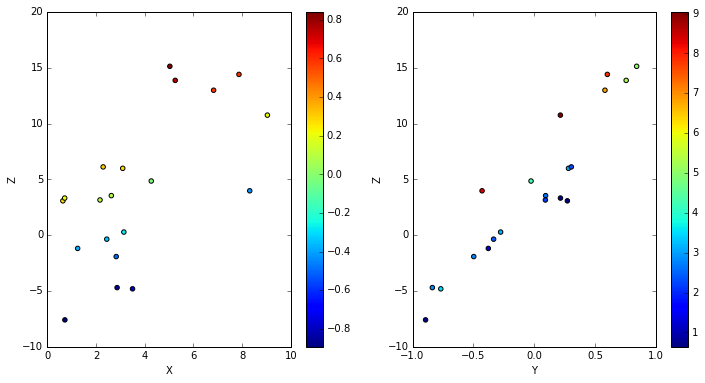

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x_true, z_obs, c=y_true, marker='o')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Z')
plt.subplot(1,2,2)
plt.scatter(y_true, z_obs, c=x_true, marker='o')
plt.colorbar()
plt.xlabel('Y')
plt.ylabel('Z');

In [3]:
import pymc
# define the parameters with their associated priors
alpha = pymc.Uniform('alpha', -100,100, value=median(z_obs))
betax = pymc.Uniform('betax', -100,100, value=std(z_obs)/std(x_true))
betay = pymc.Uniform('betay', -100,100, value=std(z_obs)/std(y_true))
eps = pymc.Uniform('eps', 0, 100, value=0.01)

# Now define the model
@pymc.deterministic
def model(alpha=alpha, betax=betax, betay=betay, x=x_true, y=y_true):
    return alpha + betax*x + betay*y

# pymc parametrizes the width of the normal distribution by tau=1/sigma**2
@pymc.deterministic
def tau(eps=eps):
    return power(eps, -2)

# Lastly relate the model/parameters to the data
data = pymc.Normal('data', mu=model, tau=tau, value=z_obs, observed=True)

In [4]:
sampler = pymc.MCMC([alpha,betax,betay,eps,model,tau,z_obs,x_true,y_true])
sampler.use_step_method(pymc.AdaptiveMetropolis, [alpha,betax,betay,eps],
                        scales={alpha:0.1, betax:0.1, betay:1.0, eps:0.1})
sampler.sample(iter=10000)

 [-----------------100%-----------------] 10000 of 10000 complete in 3.0 sec

Plotting eps
Plotting betay
Plotting alpha
Plotting tau
Plotting betax


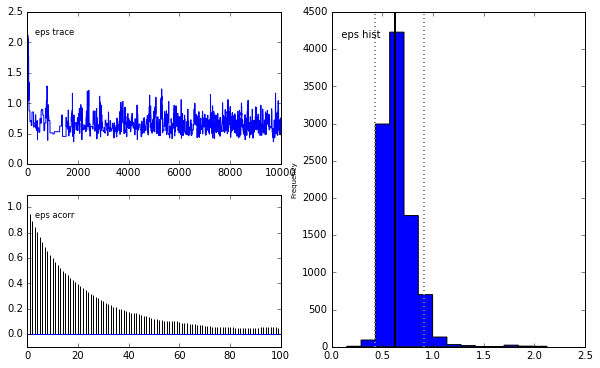

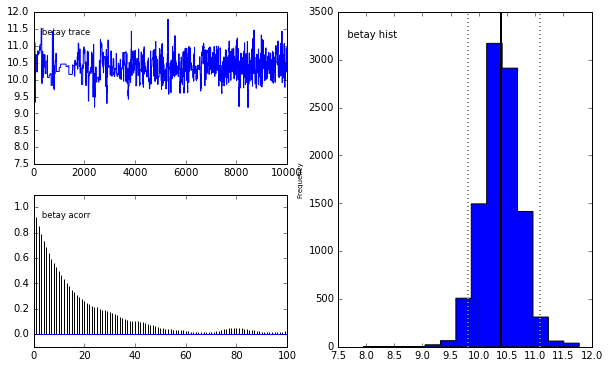

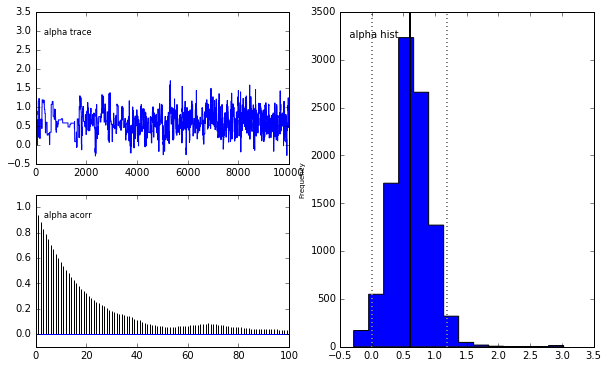

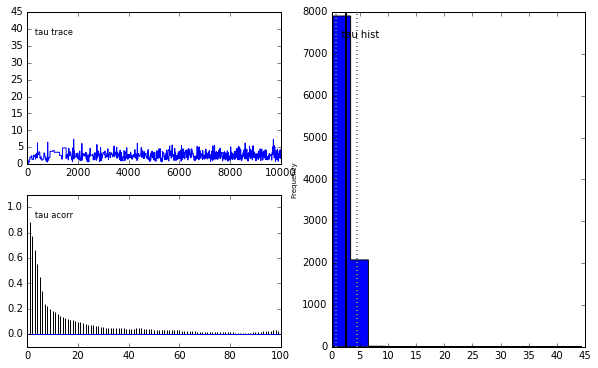

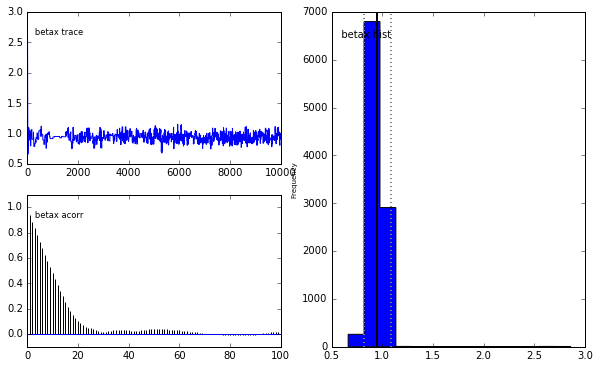

In [5]:
pymc.Matplot.plot(sampler)

In [6]:
sampler.sample(iter=10000)


 [-----------------100%-----------------] 10000 of 10000 complete in 3.0 sec

Plotting eps
Plotting betay
Plotting alpha
Plotting tau
Plotting betax


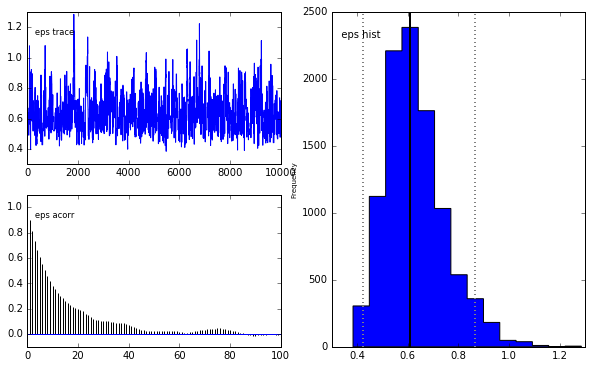

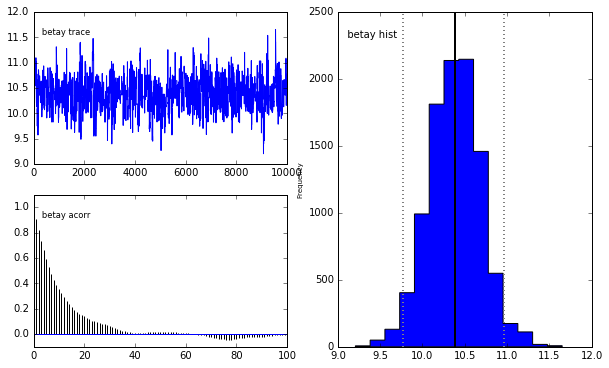

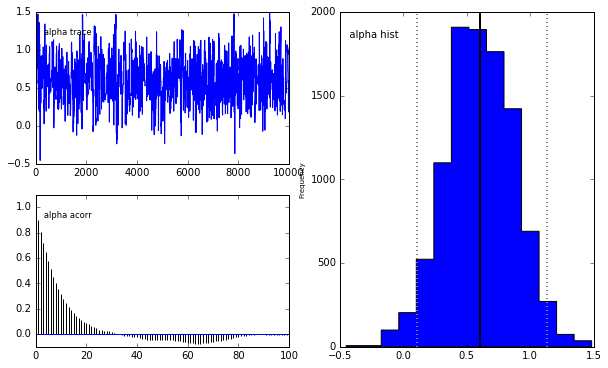

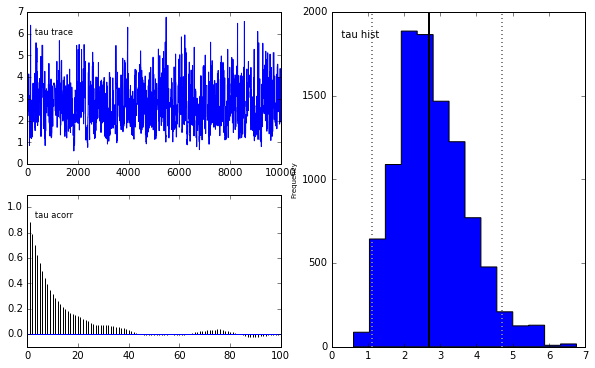

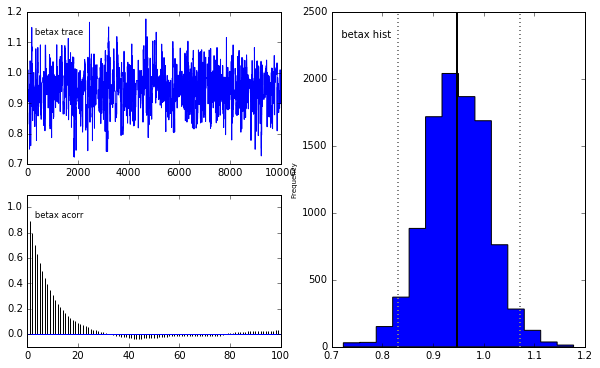

In [7]:
pymc.Matplot.plot(sampler)

In [8]:
alpha.summary()


alpha:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.614            0.289            0.01             [ 0.077  1.19 ]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	0.046            0.424           0.608          0.802         1.168
	


In [9]:
m_alpha = median(alpha.trace())
m_betax = median(betax.trace())
m_betay = median(betay.trace())
m_eps = median(eps.trace())

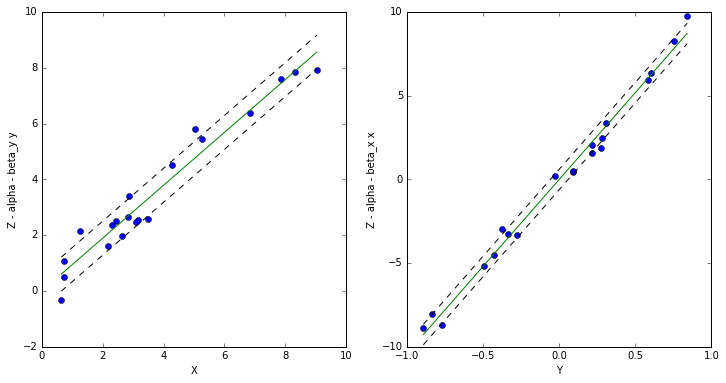

In [10]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(x_true, z_obs-m_alpha-m_betay*y_true, 'o')
plt.xlabel('X')
plt.ylabel('Z - alpha - beta_y y')
# Now plot the model
xx = array([x_true.min(), x_true.max()])
plt.plot(xx, xx*m_betax)
plt.plot(xx, xx*m_betax + m_eps, '--', color='k')
plt.plot(xx, xx*m_betax - m_eps, '--', color='k')
plt.subplot(1,2,2)
plt.plot(y_true, z_obs-m_alpha-m_betax*x_true, 'o')
plt.xlabel('Y')
plt.ylabel('Z - alpha - beta_x x')
yy = array([y_true.min(), y_true.max()])
plt.plot(yy, yy*m_betay)
plt.plot(yy, yy*m_betay + m_eps, '--', color='k')
plt.plot(yy, yy*m_betay - m_eps, '--', color='k');

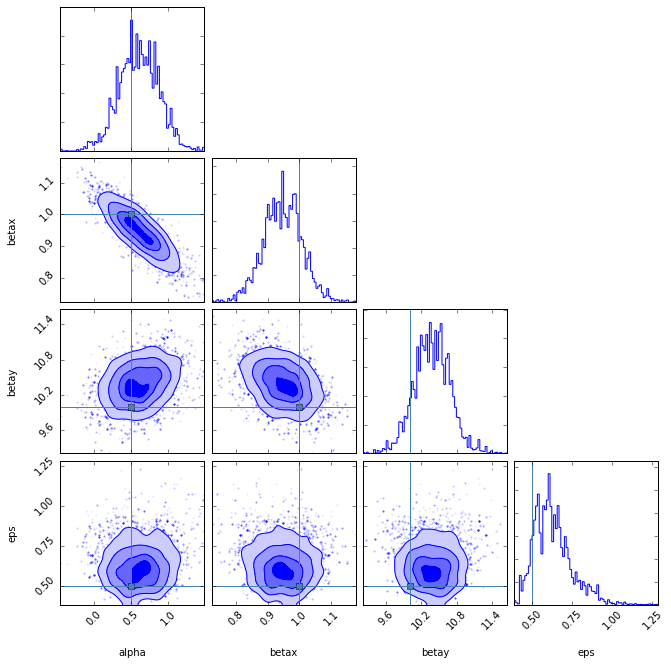

In [15]:
samples = array([alpha.trace(),betax.trace(),betay.trace(),eps.trace()]).T
import numpy as np
# pip install corner or pip install triangle_plot
import corner
figure = corner.corner(samples, color="b", bins=80, filled= True, smooth=(3),fill_contours=True,
                       labels=['alpha','betax','betay','eps'], 
                truths=[alpha_true, beta_x_true, beta_y_true, eps_true])
